In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine_dataset.csv', sep=',', quotechar='"', dtype={'Wine Type':'category'})

In [3]:
df.head(4)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   

   OD280/OD315 of diluted wines  Proline Wine Type  
0                          3.92   1065.0       One  
1                          3.40   1050.0       One  
2                          3.17   1185.0       One  
3                          3.45   1480.0       One

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Alcohol                       178 non-null    float64 
 1   Malic acid                    178 non-null    float64 
 2   Ash                           178 non-null    float64 
 3   Alcalinity of ash             178 non-null    float64 
 4   Magnesium                     178 non-null    float64 
 5   Total phenols                 178 non-null    float64 
 6   Flavanoids                    178 non-null    float64 
 7   Nonflavanoid phenols          178 non-null    float64 
 8   Proanthocyanins               178 non-null    float64 
 9   Color intensity               178 non-null    float64 
 10  Hue                           178 non-null    float64 
 11  OD280/OD315 of diluted wines  178 non-null    float64 
 12  Proline                       178 non-null    floa

In [5]:
x = df['Wine Type'].value_counts()

In [6]:
x

Two      71
One      59
Three    48
Name: Wine Type, dtype: int64

In [7]:
x = df['Wine Type'].value_counts().to_frame()

In [8]:
x

Wine Type
Two           71
One           59
Three         48

In [9]:
total = x['Wine Type'].sum()

In [10]:
total

178

In [11]:
def freq_relative(x):
    return x/total

In [12]:
def angulo(x):
    return freq_relative(x)*360

In [13]:
freq_relative(x['Wine Type'])

Two      0.398876
One      0.331461
Three    0.269663
Name: Wine Type, dtype: float64

In [14]:
x = x.assign(freq_relative=freq_relative(x['Wine Type']))
x = x.assign(angulo=angulo(x['Wine Type']))

In [15]:
x

Wine Type  freq_relative      angulo
Two           71       0.398876  143.595506
One           59       0.331461  119.325843
Three         48       0.269663   97.078652

In [16]:
x.sum()

Wine Type        178.0
freq_relative      1.0
angulo           360.0
dtype: float64

In [17]:
x

Wine Type  freq_relative      angulo
Two           71       0.398876  143.595506
One           59       0.331461  119.325843
Three         48       0.269663   97.078652

In [18]:
x.describe()

Wine Type  freq_relative      angulo
count   3.000000       3.000000    3.000000
mean   59.333333       0.333333  120.000000
std    11.503623       0.064627   23.265754
min    48.000000       0.269663   97.078652
25%    53.500000       0.300562  108.202247
50%    59.000000       0.331461  119.325843
75%    65.000000       0.365169  131.460674
max    71.000000       0.398876  143.595506

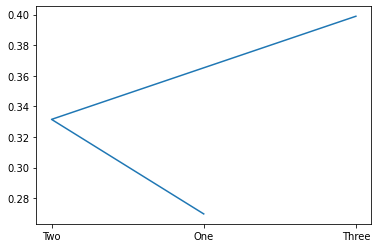

In [21]:
#Plot lineal frecuencia
ac = plt.plot(freq_relative(x['Wine Type']))

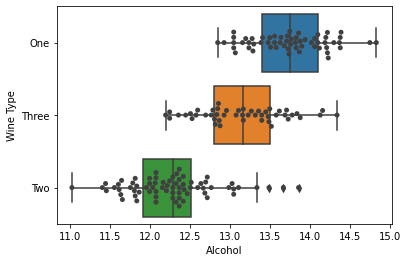

In [22]:
ax = sns.boxplot(x='Alcohol', y='Wine Type', data=df)
ax = sns.swarmplot(x='Alcohol', y='Wine Type', data=df, color='.25')

In [23]:
ald = df.groupby('Wine Type').get_group('One')
ald.head(6)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   

   OD280/OD315 of diluted wines  Proline Wine Type  
0                          3.92   1065.0       One  
1                          3.40   1050.0       One  
2                          3.17   1185.0       One  
3                          3.45   1480.0       One  
4                          2.93    735.0       One  
5                          2.85   1450.0       One

In [24]:
ald.describe()

Alcohol  Malic acid        Ash  Alcalinity of ash   Magnesium  \
count  59.000000   59.000000  59.000000          59.000000   59.000000   
mean   13.744746    2.010678   2.455593          17.037288  106.338983   
std     0.462125    0.688549   0.227166           2.546322   10.498949   
min    12.850000    1.350000   2.040000          11.200000   89.000000   
25%    13.400000    1.665000   2.295000          16.000000   98.000000   
50%    13.750000    1.770000   2.440000          16.800000  104.000000   
75%    14.100000    1.935000   2.615000          18.700000  114.000000   
max    14.830000    4.040000   3.220000          25.000000  132.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count      59.000000   59.000000             59.000000        59.000000   
mean        2.840169    2.982373              0.290000         1.899322   
std         0.338961    0.397494              0.070049         0.412109   
min         2.200000    2.190000              0.170000         1.250000   
25%         2.600000    2.680000              0.255000         1.640000   
50%         2.800000    2.980000              0.290000         1.870000   
75%         3.000000    3.245000              0.320000         2.090000   
max         3.880000    3.930000              0.500000         2.960000   

       Color intensity        Hue  OD280/OD315 of diluted wines      Proline  
count        59.000000  59.000000                     59.000000    59.000000  
mean          5.528305   1.062034                      3.157797  1115.711864  
std           1.238573   0.116483                      0.357077   221.520767  
min           3.520000   0.820000                      2.510000   680.000000  
25%           4.550000   0.995000                      2.870000   987.500000  
50%           5.400000   1.070000                      3.170000  1095.000000  
75%           6.225000   1.130000                      3.420000  1280.000000  
max           8.900000   1.280000                      4.000000  1680.000000

In [25]:
#Media alcohol
ald.mean()

Alcohol                           13.744746
Malic acid                         2.010678
Ash                                2.455593
Alcalinity of ash                 17.037288
Magnesium                        106.338983
Total phenols                      2.840169
Flavanoids                         2.982373
Nonflavanoid phenols               0.290000
Proanthocyanins                    1.899322
Color intensity                    5.528305
Hue                                1.062034
OD280/OD315 of diluted wines       3.157797
Proline                         1115.711864
dtype: float64

In [26]:
#Desviacion Estandar alcohol
ald.std()

Alcohol                           0.462125
Malic acid                        0.688549
Ash                               0.227166
Alcalinity of ash                 2.546322
Magnesium                        10.498949
Total phenols                     0.338961
Flavanoids                        0.397494
Nonflavanoid phenols              0.070049
Proanthocyanins                   0.412109
Color intensity                   1.238573
Hue                               0.116483
OD280/OD315 of diluted wines      0.357077
Proline                         221.520767
dtype: float64

In [27]:
#Alcohol
alc = df.groupby('Alcohol')

In [28]:
alc.describe()

Malic acid                                                 Ash        \
             count  mean       std   min   25%   50%   75%   max count  mean   
Alcohol                                                                        
11.03          1.0  1.51       NaN  1.51  1.51  1.51  1.51  1.51   1.0  2.20   
11.41          1.0  0.74       NaN  0.74  0.74  0.74  0.74  0.74   1.0  2.50   
11.45          1.0  2.40       NaN  2.40  2.40  2.40  2.40  2.40   1.0  2.42   
11.46          1.0  3.74       NaN  3.74  3.74  3.74  3.74  3.74   1.0  1.82   
11.56          1.0  2.05       NaN  2.05  2.05  2.05  2.05  2.05   1.0  3.23   
...            ...   ...       ...   ...   ...   ...   ...   ...   ...   ...   
14.37          1.0  1.95       NaN  1.95  1.95  1.95  1.95  1.95   1.0  2.50   
14.38          2.0  2.73  1.216224  1.87  2.30  2.73  3.16  3.59   2.0  2.33   
14.39          1.0  1.87       NaN  1.87  1.87  1.87  1.87  1.87   1.0  2.45   
14.75          1.0  1.73       NaN  1.73  1.73  1.73  1.73  1.73   1.0  2.39   
14.83          1.0  1.64       NaN  1.64  1.64  1.64  1.64  1.64   1.0  2.17   

         ... OD280/OD315 of diluted wines       Proline                      \
         ...                          75%   max   count    mean         std   
Alcohol  ...                                                                  
11.03    ...                         2.87  2.87     1.0   407.0         NaN   
11.41    ...                         2.31  2.31     1.0   434.0         NaN   
11.45    ...                         3.39  3.39     1.0   625.0         NaN   
11.46    ...                         2.81  2.81     1.0   562.0         NaN   
11.56    ...                         3.69  3.69     1.0   465.0         NaN   
...      ...                          ...   ...     ...     ...         ...   
14.37    ...                         3.45  3.45     1.0  1480.0         NaN   
14.38    ...                         3.33  3.44     2.0  1306.0  340.825469   
14.39    ...                         3.58  3.58     1.0  1290.0         NaN   
14.75    ...                         2.73  2.73     1.0  1150.0         NaN   
14.83    ...                         2.85  2.85     1.0  1045.0         NaN   

                                                 
            min     25%     50%     75%     max  
Alcohol                                          
11.03     407.0   407.0   407.0   407.0   407.0  
11.41     434.0   434.0   434.0   434.0   434.0  
11.45     625.0   625.0   625.0   625.0   625.0  
11.46     562.0   562.0   562.0   562.0   562.0  
11.56     465.0   465.0   465.0   465.0   465.0  
...         ...     ...     ...     ...     ...  
14.37    1480.0  1480.0  1480.0  1480.0  1480.0  
14.38    1065.0  1185.5  1306.0  1426.5  1547.0  
14.39    1290.0  1290.0  1290.0  1290.0  1290.0  
14.75    1150.0  1150.0  1150.0  1150.0  1150.0  
14.83    1045.0  1045.0  1045.0  1045.0  1045.0  

[126 rows x 96 columns]

In [29]:
#Media alcohol
alc.mean()

Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
Alcohol                                                                  
11.03          1.51  2.20               21.5       85.0          2.460   
11.41          0.74  2.50               21.0       88.0          2.480   
11.45          2.40  2.42               20.0       96.0          2.900   
11.46          3.74  1.82               19.5      107.0          3.180   
11.56          2.05  3.23               28.5      119.0          3.180   
...             ...   ...                ...        ...            ...   
14.37          1.95  2.50               16.8      113.0          3.850   
14.38          2.73  2.33               14.0      102.0          3.275   
14.39          1.87  2.45               14.6       96.0          2.500   
14.75          1.73  2.39               11.4       91.0          3.100   
14.83          1.64  2.17               14.0       97.0          2.800   

         Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  \
Alcohol                                                                       
11.03         2.170                  0.52            2.010             1.90   
11.41         2.010                  0.42            1.440             3.08   
11.45         2.790                  0.32            1.830             3.25   
11.46         2.580                  0.24            3.580             2.90   
11.56         5.080                  0.47            1.870             6.00   
...             ...                   ...              ...              ...   
14.37         3.490                  0.24            2.180             7.80   
14.38         3.405                  0.28            2.575             6.20   
14.39         2.520                  0.30            1.980             5.25   
14.75         3.690                  0.43            2.810             5.40   
14.83         2.980                  0.29            1.980             5.20   

          Hue  OD280/OD315 of diluted wines  Proline  
Alcohol                                               
11.03    1.71                          2.87    407.0  
11.41    1.10                          2.31    434.0  
11.45    0.80                          3.39    625.0  
11.46    0.75                          2.81    562.0  
11.56    0.93                          3.69    465.0  
...       ...                           ...      ...  
14.37    0.86                          3.45   1480.0  
14.38    1.12                          3.22   1306.0  
14.39    1.02                          3.58   1290.0  
14.75    1.25                          2.73   1150.0  
14.83    1.08                          2.85   1045.0  

[126 rows x 12 columns]

In [30]:
#Desviacion Estandar alcohol
alc.std()

Malic acid       Ash  Alcalinity of ash  Magnesium  Total phenols  \
Alcohol                                                                      
11.03           NaN       NaN                NaN        NaN            NaN   
11.41           NaN       NaN                NaN        NaN            NaN   
11.45           NaN       NaN                NaN        NaN            NaN   
11.46           NaN       NaN                NaN        NaN            NaN   
11.56           NaN       NaN                NaN        NaN            NaN   
...             ...       ...                ...        ...            ...   
14.37           NaN       NaN                NaN        NaN            NaN   
14.38      1.216224  0.070711           2.828427        0.0       0.035355   
14.39           NaN       NaN                NaN        NaN            NaN   
14.75           NaN       NaN                NaN        NaN            NaN   
14.83           NaN       NaN                NaN        NaN            NaN   

         Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  \
Alcohol                                                                       
11.03           NaN                   NaN              NaN              NaN   
11.41           NaN                   NaN              NaN              NaN   
11.45           NaN                   NaN              NaN              NaN   
11.46           NaN                   NaN              NaN              NaN   
11.56           NaN                   NaN              NaN              NaN   
...             ...                   ...              ...              ...   
14.37           NaN                   NaN              NaN              NaN   
14.38       0.33234              0.014142         0.544472         1.838478   
14.39           NaN                   NaN              NaN              NaN   
14.75           NaN                   NaN              NaN              NaN   
14.83           NaN                   NaN              NaN              NaN   

              Hue  OD280/OD315 of diluted wines     Proline  
Alcohol                                                      
11.03         NaN                           NaN         NaN  
11.41         NaN                           NaN         NaN  
11.45         NaN                           NaN         NaN  
11.46         NaN                           NaN         NaN  
11.56         NaN                           NaN         NaN  
...           ...                           ...         ...  
14.37         NaN                           NaN         NaN  
14.38    0.113137                      0.311127  340.825469  
14.39         NaN                           NaN         NaN  
14.75         NaN                           NaN         NaN  
14.83         NaN                           NaN         NaN  

[126 rows x 12 columns]

In [31]:
#Alcalinity
alc = df.groupby('Alcalinity of ash')

In [32]:
alc.describe()

Alcohol                                                     \
                    count    mean       std    min      25%     50%      75%   
Alcalinity of ash                                                              
10.6                  1.0  12.370       NaN  12.37  12.3700  12.370  12.3700   
11.2                  1.0  13.200       NaN  13.20  13.2000  13.200  13.2000   
11.4                  1.0  14.750       NaN  14.75  14.7500  14.750  14.7500   
12.0                  1.0  14.380       NaN  14.38  14.3800  14.380  14.3800   
12.4                  1.0  13.050       NaN  13.05  13.0500  13.050  13.0500   
...                   ...     ...       ...    ...      ...     ...      ...   
26.0                  1.0  11.650       NaN  11.65  11.6500  11.650  11.6500   
26.5                  1.0  12.420       NaN  12.42  12.4200  12.420  12.4200   
27.0                  1.0  12.450       NaN  12.45  12.4500  12.450  12.4500   
28.5                  2.0  11.675  0.162635  11.56  11.6175  11.675  11.7325   
30.0                  1.0  12.990       NaN  12.99  12.9900  12.990  12.9900   

                         Malic acid        ... OD280/OD315 of diluted wines  \
                     max      count  mean  ...                          75%   
Alcalinity of ash                          ...                                
10.6               12.37        1.0  0.94  ...                       1.8200   
11.2               13.20        1.0  1.78  ...                       3.4000   
11.4               14.75        1.0  1.73  ...                       2.7300   
12.0               14.38        1.0  1.87  ...                       3.0000   
12.4               13.05        1.0  1.73  ...                       2.9100   
...                  ...        ...   ...  ...                          ...   
26.0               11.65        1.0  1.67  ...                       3.2100   
26.5               12.42        1.0  4.43  ...                       3.1200   
27.0               12.45        1.0  3.03  ...                       1.7300   
28.5               11.79        2.0  2.09  ...                       3.3775   
30.0               12.99        1.0  1.67  ...                       3.5000   

                        Proline                                             \
                    max   count    mean       std     min      25%     50%   
Alcalinity of ash                                                            
10.6               1.82     1.0   520.0       NaN   520.0   520.00   520.0   
11.2               3.40     1.0  1050.0       NaN  1050.0  1050.00  1050.0   
11.4               2.73     1.0  1150.0       NaN  1150.0  1150.00  1150.0   
12.0               3.00     1.0  1547.0       NaN  1547.0  1547.00  1547.0   
12.4               2.91     1.0  1150.0       NaN  1150.0  1150.00  1150.0   
...                 ...     ...     ...       ...     ...      ...     ...   
26.0               3.21     1.0   562.0       NaN   562.0   562.00   562.0   
26.5               3.12     1.0   365.0       NaN   365.0   365.00   365.0   
27.0               1.73     1.0   880.0       NaN   880.0   880.00   880.0   
28.5               3.69     2.0   465.5  0.707107   465.0   465.25   465.5   
30.0               3.50     1.0   985.0       NaN   985.0   985.00   985.0   

                                    
                       75%     max  
Alcalinity of ash                   
10.6                520.00   520.0  
11.2               1050.00  1050.0  
11.4               1150.00  1150.0  
12.0               1547.00  1547.0  
12.4               1150.00  1150.0  
...                    ...     ...  
26.0                562.00   562.0  
26.5                365.00   365.0  
27.0                880.00   880.0  
28.5                465.75   466.0  
30.0                985.00   985.0  

[63 rows x 96 columns]

In [33]:
alc.mean()

Alcohol  Malic acid    Ash  Magnesium  Total phenols  \
Alcalinity of ash                                                         
10.6                12.370        0.94  1.360       88.0          1.980   
11.2                13.200        1.78  2.140      100.0          2.650   
11.4                14.750        1.73  2.390       91.0          3.100   
12.0                14.380        1.87  2.380      102.0          3.300   
12.4                13.050        1.73  2.040       92.0          2.720   
...                    ...         ...    ...        ...            ...   
26.0                11.650        1.67  2.620       88.0          1.920   
26.5                12.420        4.43  2.730      102.0          2.200   
27.0                12.450        3.03  2.640       97.0          1.900   
28.5                11.675        2.09  3.005      105.5          2.655   
30.0                12.990        1.67  2.600      139.0          3.300   

                   Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
Alcalinity of ash                                                      
10.6                     0.57                 0.280            0.420   
11.2                     2.76                 0.260            1.280   
11.4                     3.69                 0.430            2.810   
12.0                     3.64                 0.290            2.960   
12.4                     3.27                 0.170            2.910   
...                       ...                   ...              ...   
26.0                     1.61                 0.400            1.340   
26.5                     2.13                 0.430            1.710   
27.0                     0.58                 0.630            1.140   
28.5                     3.66                 0.525            1.815   
30.0                     2.89                 0.210            1.960   

                   Color intensity   Hue  OD280/OD315 of diluted wines  \
Alcalinity of ash                                                        
10.6                          1.95  1.05                         1.820   
11.2                          4.38  1.05                         3.400   
11.4                          5.40  1.25                         2.730   
12.0                          7.50  1.20                         3.000   
12.4                          7.20  1.12                         2.910   
...                            ...   ...                           ...   
26.0                          2.60  1.36                         3.210   
26.5                          2.08  0.92                         3.120   
27.0                          7.50  0.67                         1.730   
28.5                          4.50  0.95                         3.065   
30.0                          3.35  1.31                         3.500   

                   Proline  
Alcalinity of ash           
10.6                 520.0  
11.2                1050.0  
11.4                1150.0  
12.0                1547.0  
12.4                1150.0  
...                    ...  
26.0                 562.0  
26.5                 365.0  
27.0                 880.0  
28.5                 465.5  
30.0                 985.0  

[63 rows x 12 columns]

In [34]:
alc.std()

Alcohol  Malic acid       Ash  Magnesium  Total phenols  \
Alcalinity of ash                                                             
10.6                    NaN         NaN       NaN        NaN            NaN   
11.2                    NaN         NaN       NaN        NaN            NaN   
11.4                    NaN         NaN       NaN        NaN            NaN   
12.0                    NaN         NaN       NaN        NaN            NaN   
12.4                    NaN         NaN       NaN        NaN            NaN   
...                     ...         ...       ...        ...            ...   
26.0                    NaN         NaN       NaN        NaN            NaN   
26.5                    NaN         NaN       NaN        NaN            NaN   
27.0                    NaN         NaN       NaN        NaN            NaN   
28.5               0.162635    0.056569  0.318198  19.091883       0.742462   
30.0                    NaN         NaN       NaN        NaN            NaN   

                   Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
Alcalinity of ash                                                      
10.6                      NaN                   NaN              NaN   
11.2                      NaN                   NaN              NaN   
11.4                      NaN                   NaN              NaN   
12.0                      NaN                   NaN              NaN   
12.4                      NaN                   NaN              NaN   
...                       ...                   ...              ...   
26.0                      NaN                   NaN              NaN   
26.5                      NaN                   NaN              NaN   
27.0                      NaN                   NaN              NaN   
28.5                 2.008183              0.077782         0.077782   
30.0                      NaN                   NaN              NaN   

                   Color intensity       Hue  OD280/OD315 of diluted wines  \
Alcalinity of ash                                                            
10.6                           NaN       NaN                           NaN   
11.2                           NaN       NaN                           NaN   
11.4                           NaN       NaN                           NaN   
12.0                           NaN       NaN                           NaN   
12.4                           NaN       NaN                           NaN   
...                            ...       ...                           ...   
26.0                           NaN       NaN                           NaN   
26.5                           NaN       NaN                           NaN   
27.0                           NaN       NaN                           NaN   
28.5                       2.12132  0.028284                      0.883883   
30.0                           NaN       NaN                           NaN   

                    Proline  
Alcalinity of ash            
10.6                    NaN  
11.2                    NaN  
11.4                    NaN  
12.0                    NaN  
12.4                    NaN  
...                     ...  
26.0                    NaN  
26.5                    NaN  
27.0                    NaN  
28.5               0.707107  
30.0                    NaN  

[63 rows x 12 columns]

In [36]:
re = sns.swarmplot(x='Alcohol', y='Color intensity', data=df, color='Green')
re = sns.boxplot(x='Alcohol', y='Color intensity', data=df, color='Blue')